In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
df=pd.read_csv('../data/cancer_classification.csv')

In [46]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [47]:
x=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler=MinMaxScaler()

In [52]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

In [54]:
model=Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
from datetime import datetime

In [56]:
timestamp=datetime.now().strftime('%d-%m-%Y--%H%M%S')
timestamp

'13-04-2023--204008'

In [57]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=10)

In [58]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=450,callbacks=[early])

Epoch 1/450
13/13 [==============================] - 1s 23ms/step - loss: 0.7198 - accuracy: 0.4095 - val_loss: 0.6953 - val_accuracy: 0.4386
Epoch 2/450
13/13 [==============================] - 0s 8ms/step - loss: 0.6862 - accuracy: 0.5050 - val_loss: 0.6610 - val_accuracy: 0.7485
Epoch 3/450
13/13 [==============================] - 0s 8ms/step - loss: 0.6495 - accuracy: 0.6709 - val_loss: 0.6280 - val_accuracy: 0.9064
Epoch 4/450
13/13 [==============================] - 0s 8ms/step - loss: 0.6162 - accuracy: 0.7789 - val_loss: 0.5883 - val_accuracy: 0.9006
Epoch 5/450
13/13 [==============================] - 0s 8ms/step - loss: 0.5911 - accuracy: 0.8015 - val_loss: 0.5498 - val_accuracy: 0.8772
Epoch 6/450
13/13 [==============================] - 0s 8ms/step - loss: 0.5431 - accuracy: 0.8342 - val_loss: 0.5101 - val_accuracy: 0.8772
Epoch 7/450
13/13 [==============================] - 0s 8ms/step - loss: 0.5114 - accuracy: 0.8367 - val_loss: 0.4694 - val_accuracy: 0.8830
Epoch 8/450


In [59]:
loss=pd.DataFrame(model.history.history)

<Axes: >

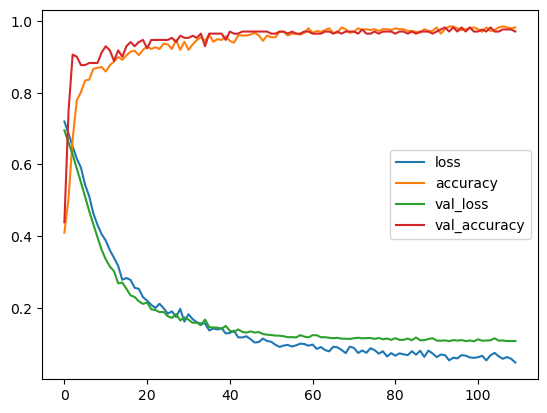

In [60]:
loss.plot()

In [65]:
pred=(model.predict(x_test)>0.5).astype('int32')

6/6 [==============================] - 0s 3ms/step


In [66]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [68]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



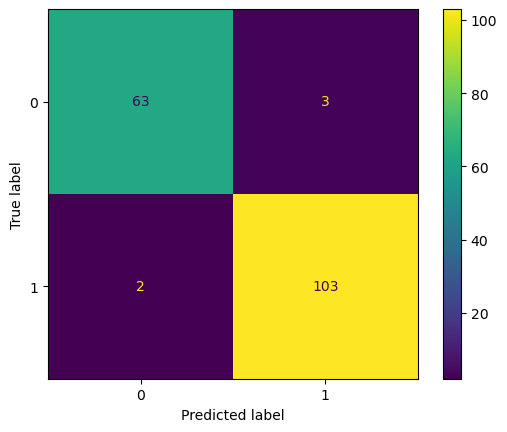

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [71]:
new=x_test[0].reshape(-1,30)

In [73]:
a=scaler.fit_transform(new)

In [75]:
(model.predict(a)>0.5).astype('int32')

1/1 [==============================] - 0s 13ms/step


array([[1]], dtype=int32)

In [76]:
y_test[0]

1